--- Best Fit Result ---
The estimated temperature of the sun is: 5751.21 K


<>:69: SyntaxWarning: invalid escape sequence '\c'
<>:69: SyntaxWarning: invalid escape sequence '\c'
C:\Users\luoog\AppData\Local\Temp\ipykernel_37560\1798295337.py:69: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('Spectral Irradiance ($W \cdot m^{-2} \cdot nm^{-1}$)')


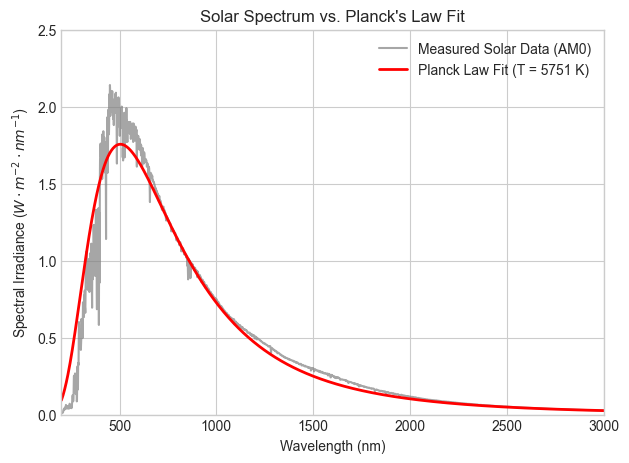

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# --- 1. Define Physical Constants (in SI units) ---
h = 6.626e-34  # Planck's constant (J*s)
c = 3.0e8      # Speed of light (m/s)
k = 1.38e-23  # Boltzmann's constant (J/K)
R_sun = 7.0e8    # Radius of the Sun (m)
L_earth = 1.5e11 # Distance from Sun to Earth (m)

# --- 2. Load and Prepare the Data ---
file_path = 'Problem 1.1 (Spectral data from the sun) - Sheet1.csv'
# We might need to skip the first row if it's a title row
try:
    df = pd.read_csv(file_path, header=1) # Assumes the real headers are on the second line
except Exception:
    df = pd.read_csv(file_path) # Fallback if the first line is the header

# Rename columns for easier access
df.columns = ['wavelength_nm', 'irradiance_per_nm']

# --- FIX THE DATA TYPE ERROR HERE ---
# Convert columns to a numeric type. 'coerce' turns any non-numeric values into NaN (Not a Number).
df['wavelength_nm'] = pd.to_numeric(df['wavelength_nm'], errors='coerce')
df['irradiance_per_nm'] = pd.to_numeric(df['irradiance_per_nm'], errors='coerce')

# Drop any rows that couldn't be converted (they are now NaN)
df.dropna(inplace=True)
# ------------------------------------

# Now the math operations will work correctly
df['wavelength_m'] = df['wavelength_nm'] * 1e-9
df['irradiance_si'] = df['irradiance_per_nm'] * 1e9 # Convert from per-nm to per-m

# --- 3. Define the Fitting Function (Our Physics Model) ---
def solar_irradiance_model(lambda_m, T):
    dilution_factor = np.pi * (R_sun / L_earth)**2
    exponent = (h * c) / (lambda_m * k * T)
    radiance = (2 * h * c**2) / (lambda_m**5 * (np.exp(np.clip(exponent, 0, 700)) - 1))
    return radiance * dilution_factor

# --- 4. Perform the Curve Fit ---
fit_df = df[(df['wavelength_nm'] > 250) & (df['wavelength_nm'] < 2500)]
initial_guess = [5800] 
popt, pcov = curve_fit(
    solar_irradiance_model, 
    fit_df['wavelength_m'], 
    fit_df['irradiance_si'], 
    p0=initial_guess
)
best_fit_T = popt[0]

print(f"--- Best Fit Result ---")
print(f"The estimated temperature of the sun is: {best_fit_T:.2f} K")

# --- 5. Plot the Results ---
lambda_plot_nm = np.linspace(200, 3000, 1000)
lambda_plot_m = lambda_plot_nm * 1e-9
fit_curve_si = solar_irradiance_model(lambda_plot_m, best_fit_T)
fit_curve_per_nm = fit_curve_si / 1e9

plt.figure(figsize=(7, 5))
plt.plot(df['wavelength_nm'], df['irradiance_per_nm'], label='Measured Solar Data (AM0)', color='gray', alpha=0.7)
plt.plot(lambda_plot_nm, fit_curve_per_nm, label=f'Planck Law Fit (T = {best_fit_T:.0f} K)', color='red', linewidth=2)
plt.title('Solar Spectrum vs. Planck\'s Law Fit')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Spectral Irradiance ($W \cdot m^{-2} \cdot nm^{-1}$)')
plt.legend()
plt.grid(True)
plt.xlim(200, 3000)
plt.ylim(0, 2.5)
plt.show()
